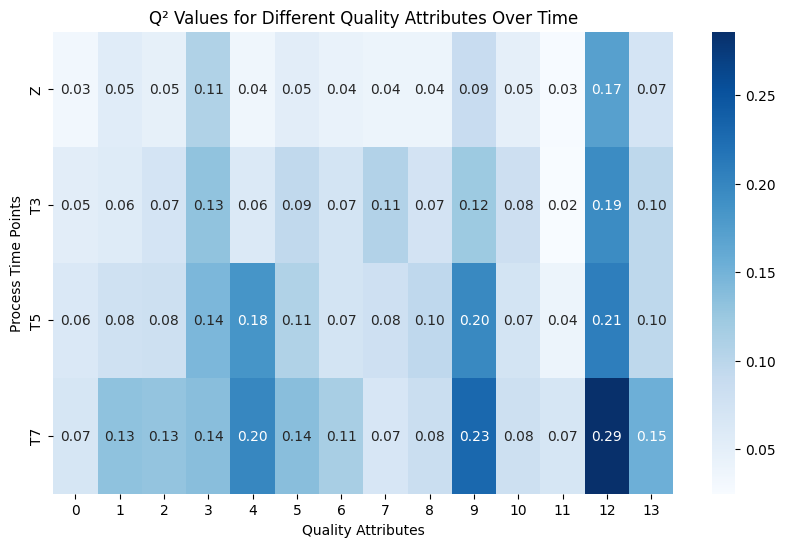

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 模拟数据（替换为真实数据）
np.random.seed(42)
n_samples = 91
n_predictors = 20
n_quality_attrs = 14

X = np.random.randn(n_samples, n_predictors)  # 过程信息
Y = np.random.randn(n_samples, n_quality_attrs)  # 质量属性

# 进行 PLS1 回归并计算 Q²
def pls1_predict(X, Y, n_components=5):
    pls = PLSRegression(n_components=n_components)
    pls.fit(X, Y)
    Y_pred = pls.predict(X)
    return r2_score(Y, Y_pred, multioutput='raw_values')

# 自动缩放数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 不同时间点的过程数据
process_blocks = {
    'Z': X_scaled[:, :5],
    'T3': X_scaled[:, :10],
    'T5': X_scaled[:, :15],
    'T7': X_scaled[:, :20]
}

# 为每个质量属性构建 PLS1 模型
q2_values = {}
for time_point, X_block in process_blocks.items():
    q2_values[time_point] = pls1_predict(X_block, Y)

# 可视化结果
plt.figure(figsize=(10, 6))
sns.heatmap(pd.DataFrame(q2_values).T, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Quality Attributes")
plt.ylabel("Process Time Points")
plt.title("Q² Values for Different Quality Attributes Over Time")
plt.show()